In [79]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from imutils import printImage, generateRadomColor, rotate

%matplotlib inline

In [2]:
image1 = cv2.imread("./data/img1.jpg")
image2 = cv2.imread("./data/img2.jpg")

image3 = cv2.absdiff(image1, image2)

In [29]:
printImage(image3)

In [6]:
image3.shape

(720, 1280, 3)

In [7]:
cv2.imwrite("./data/eu.jpg", image3)

True

# Manipulando pixels

In [8]:
(b, g, r) = image3[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 7, Green: 10, Blue: 5


In [9]:
image3[0, 0] = (0, 0, 255)
(b, g, r) = image3[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


In [30]:
for x in range(10000):
    i = random.randint(0, image3.shape[0] - 1)
    j = random.randint(0, image3.shape[1] - 1)
    image3[i, j] = generateRadomColor()

In [31]:
printImage(image3)

# Desenhando com OpenCV

In [12]:
import cv2
import numpy as np

canvas = np.zeros((300, 300, 3), dtype="uint8")

In [13]:
printImage(canvas)

### Linha

In [14]:
green = (0, 255, 0)
result = cv2.line(canvas, (0, 0), (300, 300), green, 5)
printImage(result)

### Retângulo

In [15]:
red = (0, 0, 255)
result = cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
printImage(result)

### Círculo

In [16]:
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)
for r in range(0, 175, 25):
    cv2.circle(canvas, (centerX, centerY), r, white)
printImage(canvas)

# Transformando Imagens

### Movendo a imagem dentro do frame

In [26]:
def translate(image, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]]) # matriz de transformação
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

In [25]:
x = 100 # shifting the image 100 pixels to the right
y = 50 # shifting the image 50 pixels down side
shifted = translate(image3, x, y)
printImage(shifted)

### Rotacionando a Imagem

In [8]:
(h, w) = image3.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 45, 1.0) # rotacionando 45 graus
rotated = cv2.warpAffine(image3, M, (w, h))
printImage(rotated)

In [20]:
from imutils import rotate

rotated2 = rotate(image3, -90, scale=0.5)
printImage(rotated2)

### Redimensionando

In [14]:
r = 150.0 / image3.shape[1] # razão entre largura nova e antiga
dim = (150, int(image3.shape[0] * r)) # a altura terá mesma proporção da nova largura
print(image3.shape[:2])
print(dim[1], dim[0])

(720, 1280)
84 150


The last parameter is our interpolation method, which is the
algorithm working behind the scenes to handle how the
actual image is resized. In general, I find that using cv2.
INTER_AREA obtains the best results when resizing; however,
other appropriate choices include cv2.INTER_LINEAR,
cv2.INTER_CUBIC, and cv2.INTER_NEAREST.

In [16]:
resized = cv2.resize(image3, dim, interpolation = cv2.INTER_AREA)
printImage(resized)

In [26]:
#from imutils import resize
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image

    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)

    else:
        r = width / float(w)
        dim = (width, int(h * r))

    resized = cv2.resize(image, dim, interpolation = inter)

    return resized

resized2 = resize(image3, height=2000)
printImage(resized2)

### Girando a Imagem

In [36]:
# 1 para girar horizontalmente em torno do eixo y
# 0 pra girar verticalmente em torno do eixo x
# -1 irá girar em torno dos 2 eixos
flipped = cv2.flip(image3, -1)
printImage(flipped)

### Cortando 

OpenCV represents images as NumPy arrays
with the the height first and the width second

In [49]:
cropped = image3[240:600 , 240:550]
printImage(cropped)

### Aritimética de Imagens

Which way is the “correct” way to handle image additions
and subtractions that fall outside the range of [0, 255]?

It simply depends
on how you are manipulate your pixels and what you want
the desired results to be.

NumPy will
perform modulo arithmetic and “wrap around”. OpenCV,
on the other hand, will perform clipping and ensure pixel
values never fall outside the range [0, 255].

In [51]:
# openCV ao somar 200+100 = 300
# irá "cortar a sobra" de modo 
# a não ultrapassar 255
v1 = np.uint8([200])
v2 = np.uint8([100])
added_value = cv2.add(v1, v2)
print("max of 255: {}".format(added_value))

max of 255: [[255]]


In [53]:
# 50 - 100 = -50 mas no openCV será 0
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))

min of 0: [[0]]


O numpy por outro lado faz operações de módulo 256 (pois são 256 números de 0 a 255):

In [69]:
numbers = [i for i in range(256)]
print(len(numbers))
print(numbers)

256
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

In [84]:
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))

wrap around: [44]


(200+100)%256

In [71]:
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

wrap around: [206]


In [72]:
(50 - 100)%256

206

In [77]:
# subtraindo ao estilo openCV
image4 = cv2.subtract(image1, image2)
printImage(image4)

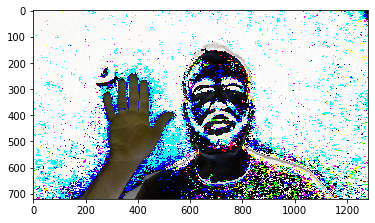

In [82]:
# subtraindo ao estilo numpy
# usando módulo 256
image5 = image1 - image2
plt.imshow(image5)
plt.show()

In [100]:
# Como o openCV lê cada pixel como BGR
# ao invés de RGB, onde deveria ser azul 
# fica vermelho e vice-versa. Printando a imagem
# usado o openCV vc perceberá a diferença.
printImage(image5)

# Histogramas

### Histogramas na escala de cinza

In [92]:
images = [image1, image2, image3, image5]
gray_images = [cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) for im in images] # convertendo pra cinza
hist = cv2.calcHist(images = gray_images, 
                    channels = [0], # grayscale image has only one channel, hence we have a value of [0] for channels
                    mask = None, # We don’t have a mask
                    histSize = [256], # We will use 256 bins in our histogram
                    ranges = [0, 256]) # the possible values range from 0 to 256

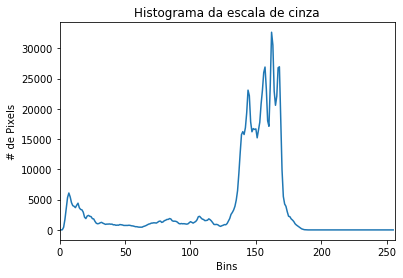

-1

In [91]:
plt.figure()
plt.title("Histograma da escala de cinza")
plt.xlabel("Bins")
plt.ylabel("# de Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

In [99]:
printImage(gray_images[3])

### Histograma de Cores

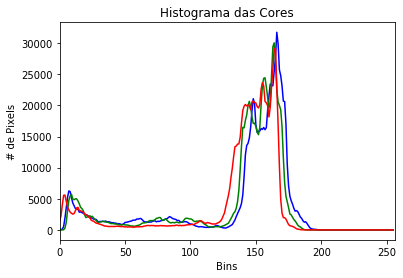

In [104]:
chans = cv2.split(image1) # split the image into its three channels: blue, green, and red
colors = ("b", "g", "r") # OpenCV stores the image as a NumPy array in reverse order: BGR.
plt.figure()
plt.title("Histograma das Cores")
plt.xlabel("Bins")
plt.ylabel("# de Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

### Histogramas 2D

I like to explain multi-dimensional histograms by using
the word AND.

For example, we can ask a question such as, “How many
pixels have a Red value of 10 AND a Blue value of 30?”.
How many pixels have a Green value of 200 AND a Red
value of 130? By using the conjunctive AND, we are able to
construct multi-dimensional histograms.

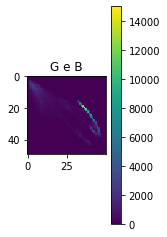

In [127]:
image_praia = cv2.imread("./data/praia.png")
chans = cv2.split(image_praia)
fig = plt.figure()
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [50, 50], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("G e B")
plt.colorbar(p);

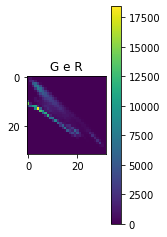

In [129]:
chans = cv2.split(image_praia)
fig = plt.figure()
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("G e R")
plt.colorbar(p);

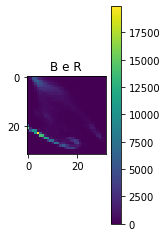

In [131]:
chans = cv2.split(image_praia)
fig = plt.figure()
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("B e R")
plt.colorbar(p);

# Extraindo Frames de um vídeo

In [148]:
import cv2

vidcap = cv2.VideoCapture('./data/video.mp4')
success,image = vidcap.read()
frames = [image]
count = 0
while success:
    cv2.imwrite("data/framesVideo/frame%d.jpg" % count, image) # save frame as JPEG file
    success,image = vidcap.read()
    frames.append(image)
    print ('Read a new frame: ', success)
    count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [149]:
printImage(frames[100])